In [3]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

/Users/siddarthnachannagari/PycharmProjects/NFLResourceAnalysis/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
rb_df = pd.read_csv('Combined_RB.csv') #Reading in Combined Positional data
metric = 'weighted_avg_breakaway_yards' #Using Average Breakaway Yards to Predict

In [5]:
print(rb_df.columns)

Index(['Unnamed: 0', 'Unnamed: 0_x', 'Team', 'Year', 'Position',
       'Value_cap_space', 'Value_draft_data', 'Previous_AV', 'Current_AV',
       'Previous_PFF', 'Current_PFF_x', 'Total DVOA', 'win-loss-pct',
       'Net EPA', 'Unnamed: 0_y', 'weighted_avg_attempts',
       'weighted_avg_avoided_tackles', 'weighted_avg_breakaway_attempts',
       'weighted_avg_breakaway_percent', 'weighted_avg_breakaway_yards',
       'weighted_avg_declined_penalties', 'weighted_avg_designed_yards',
       'weighted_avg_drops', 'weighted_avg_elu_recv_mtf',
       'weighted_avg_elu_rush_mtf', 'weighted_avg_elu_yco',
       'weighted_avg_elusive_rating', 'weighted_avg_explosive',
       'weighted_avg_first_downs', 'weighted_avg_franchise_id',
       'weighted_avg_fumbles', 'weighted_avg_gap_attempts',
       'weighted_avg_grades_hands_fumble', 'Current_PFF_y',
       'weighted_avg_grades_offense_penalty', 'weighted_avg_grades_pass',
       'weighted_avg_grades_pass_block', 'weighted_avg_grades_pass_rout

In [6]:
drop_col = ['Unnamed: 0']
rb_df = rb_df.drop(columns=drop_col)

In [7]:
rb_df.head(20)

,Unnamed: 0_x,Team,Year,Position,Value_cap_space,Value_draft_data,Previous_AV,Current_AV,Previous_PFF,Current_PFF_x,...,Previous_scrambles,Previous_targets,Previous_total_touches,Previous_touchdowns,Previous_yards,Previous_yards_after_contact,Previous_yco_attempt,Previous_ypa,Previous_yprr,Previous_zone_attempts
0,32,Buccaneers,2019,HB,2.247609,126.419891,7.0,13.0,64.767308,65.581604,...,0.000,26.939189,211.226351,4.141892,704.385135,507.327703,2.547365,3.526689,0.467399,103.229730
1,33,Packers,2019,HB,1.163656,31.352719,10.0,18.0,72.643895,81.600456,...,0.000,31.600000,144.843636,5.418182,564.112727,334.698182,2.771527,4.706182,0.891600,77.625455
2,34,Giants,2019,HB,4.404888,578.472330,17.0,12.0,80.499291,69.028045,...,0.000,96.933962,299.443396,9.188679,1101.273585,734.207547,3.138302,4.717925,1.441792,149.160377
3,35,Commanders,2019,HB,3.475027,102.500497,11.0,13.0,71.444032,67.490256,...,0.000,27.679612,232.226537,5.686084,872.203883,628.378641,2.902330,4.140777,1.269871,91.779935
4,36,Patriots,2019,HB,6.556854,202.527583,20.0,17.0,71.641226,70.494015,...,0.000,39.258242,181.936813,4.736264,673.711538,376.887363,2.363022,4.331868,1.284038,49.873626
5,37,Vikings,2019,HB,1.987248,160.892394,12.0,25.0,72.750276,76.719881,...,0.000,33.941980,156.709898,3.774744,557.928328,377.389078,2.936212,4.315700,0.914369,82.836177
6,38,Broncos,2019,HB,1.222104,63.971498,14.0,14.0,73.200903,69.022851,...,0.000,35.252809,181.887640,6.775281,767.011236,406.938202,2.757472,4.888764,1.040393,75.359551
7,39,Falcons,2019,HB,4.622742,44.313414,13.0,13.0,65.960274,59.997733,...,0.000,31.726667,148.433333,3.426667,554.223333,349.920000,2.785300,4.561333,0.847900,85.510000
8,40,Bengals,2019,HB,3.900106,133.421060,16.0,11.0,74.236504,70.374495,...,0.000,49.470588,232.699346,6.718954,943.294118,530.209150,2.680392,4.661438,1.070850,127.313725
9,41,Colts,2019,HB,1.514346,45.016446,16.0,18.0,68.290828,70.317484,...,0.000,35.177650,167.667622,5.687679,641.498567,388.372493,2.716791,4.544413,0.784097,52.326648


In [8]:
team_data = rb_df.groupby('Team')
print(rb_df.head(32)) #check all the teams are have their rb values grouped

    Unnamed: 0_x        Team  Year Position  Value_cap_space  \
0             32  Buccaneers  2019       HB         2.247609   
1             33     Packers  2019       HB         1.163656   
2             34      Giants  2019       HB         4.404888   
3             35  Commanders  2019       HB         3.475027   
4             36    Patriots  2019       HB         6.556854   
5             37     Vikings  2019       HB         1.987248   
6             38     Broncos  2019       HB         1.222104   
7             39     Falcons  2019       HB         4.622742   
8             40     Bengals  2019       HB         3.900106   
9             41       Colts  2019       HB         1.514346   
10            42    Steelers  2019       HB         1.493092   
11            43     Jaguars  2019       HB         4.505845   
12            44       Bears  2019       HB         0.951116   
13            45    Seahawks  2019       HB         0.329437   
14            46    Panthers  2019      

In [9]:
sequences = []
targets = []

#Iterating over team and their data
for team, group in team_data:
    if len(group) >= 4:
        print(f"Processing team: {team}, data length(years): {len(group)}")
        
        #Iterate through data to make sequences for every 3 years
        for i in range(len(group) - 3):
            sequence = group.iloc[i:i+3][['Value_cap_space', 'Previous_PFF', 'weighted_avg_avoided_tackles', 'weighted_avg_breakaway_attempts','weighted_avg_breakaway_percent', 'weighted_avg_breakaway_yards']]
            #target the proceeding year's Current PFF to compare
            target = group.iloc[i+3]['weighted_avg_breakaway_yards']
            sequences.append(sequence.values) #Add sequence values to sequence list
            targets.append(target) #Add target values to target list
            
#Convert lists to numpy arrays
s = np.array(sequences)
t = np.array(targets)

print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {s.shape}, y shape: {t.shape}")

Processing team: 49ers, data length(years): 4
Processing team: Bears, data length(years): 4
Processing team: Bengals, data length(years): 4
Processing team: Bills, data length(years): 4
Processing team: Broncos, data length(years): 4
Processing team: Browns, data length(years): 4
Processing team: Buccaneers, data length(years): 4
Processing team: Cardinals, data length(years): 4
Processing team: Chargers, data length(years): 4
Processing team: Chiefs, data length(years): 4
Processing team: Colts, data length(years): 4
Processing team: Commanders, data length(years): 4
Processing team: Cowboys, data length(years): 4
Processing team: Dolphins, data length(years): 4
Processing team: Eagles, data length(years): 4
Processing team: Falcons, data length(years): 4
Processing team: Giants, data length(years): 4
Processing team: Jaguars, data length(years): 4
Processing team: Jets, data length(years): 4
Processing team: Lions, data length(years): 4
Processing team: Packers, data length(years): 4

In [10]:

# Reshape X to (samples, timesteps, features)
S = s.reshape(s.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(S.shape)  # Should now be (samples, 3, features)
print(S)

(32, 3, 6)
[[[3.58129649e+00 6.69894484e+01 2.04386792e+01 9.78301887e+00
   3.76936321e+01 2.35856132e+02]
  [4.35923310e+00 7.27191268e+01 1.16226913e+01 5.20316623e+00
   2.73968338e+01 1.28382586e+02]
  [2.38356164e+00 7.11088300e+01 2.44914286e+01 5.46285714e+00
   1.96040000e+01 1.42154286e+02]]

 [[9.51115834e-01 6.92217484e+01 3.90129870e+01 4.13636364e+00
   1.36350649e+01 1.08448052e+02]
  [1.06962664e+00 6.44849515e+01 4.22694611e+01 4.53892216e+00
   1.98709581e+01 1.81500000e+02]
  [1.93972603e+00 7.79867612e+01 2.89539295e+01 5.49322493e+00
   1.93607046e+01 1.28070461e+02]]

 [[3.90010627e+00 7.42365039e+01 4.49546828e+01 1.22386707e+01
   2.82450151e+01 2.66610272e+02]
  [3.18365288e+00 7.03744949e+01 1.53313253e+01 2.36445783e+00
   1.72692771e+01 5.66566265e+01]
  [5.78630137e+00 6.66884615e+01 3.31715040e+01 9.68073879e+00
   2.13546174e+01 2.09569921e+02]]

 [[2.42295430e+00 6.35531707e+01 2.41982249e+01 9.73372781e+00
   3.00715976e+01 2.08834320e+02]
  [2.28557013

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the input layer
inputs = Input(shape=(3, 6))  # 3 time steps, 6 features because I had less features than 8

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback to monitor validation loss
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 42764.4414 - val_loss: 56971.7422
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 49360.4570 - val_loss: 56680.9688
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41716.1641 - val_loss: 56381.2852
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 49208.3047 - val_loss: 56063.3477
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 44252.0000 - val_loss: 55719.7500


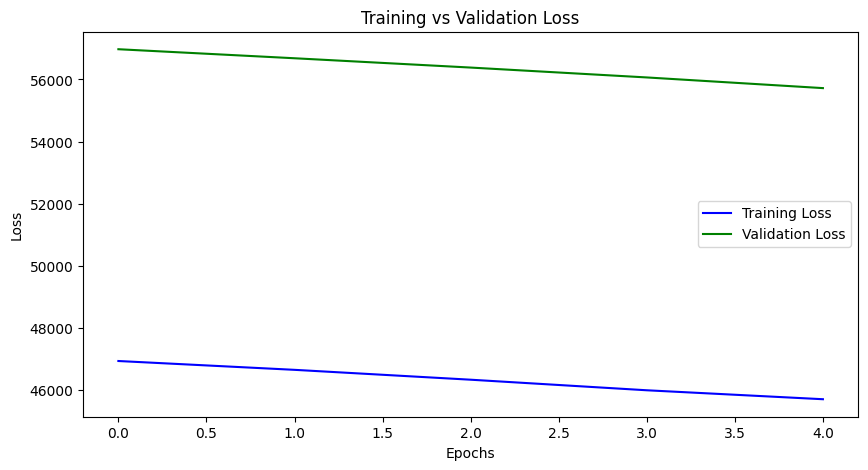

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
R² Score: -4.5825


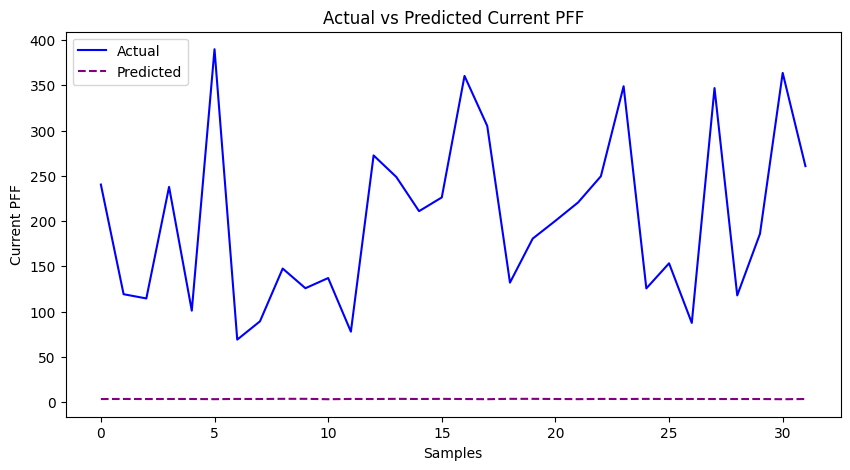

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 40771.0469 - val_loss: 55368.0742
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36821.4805 - val_loss: 54988.9727
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38483.5703 - val_loss: 54530.7852
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 46104.9023 - val_loss: 53989.2227
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44760.5195 - val_loss: 53357.2773
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 43734.3516 - val_loss: 52629.7695
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40092.8711 - val_loss: 51783.1172
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 43397.6523 - val_loss: 50774.5352
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44558.7148 - val_loss: 49598.1250
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34854.8164 - val_loss: 48247.9609


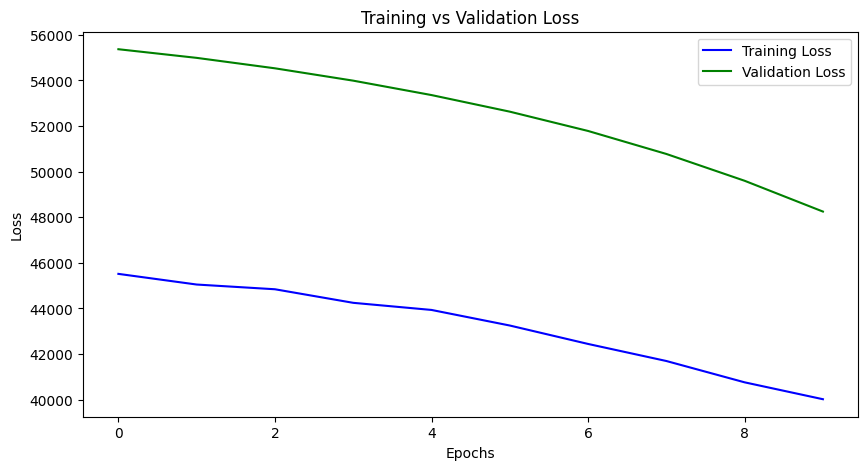

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R² Score: -3.7768


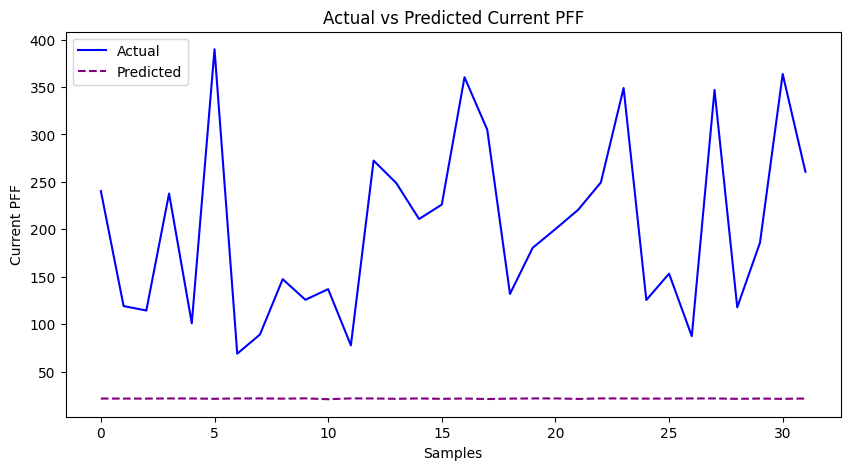

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 41754.3594 - val_loss: 46658.5273
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40809.3398 - val_loss: 44764.7500
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 36949.7656 - val_loss: 42631.1328
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 35895.7734 - val_loss: 40199.3320
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 33622.9805 - val_loss: 37442.1992
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 32126.6953 - val_loss: 34401.8867
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26497.0625 - val_loss: 31101.6738
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26337.7148 - val_loss: 27594.7539
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18024.0645 - val_loss: 24067.4941
Epoch 10/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18192.0020 - val_loss: 20541.1250
Epoch 11/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20076.4980 - val_loss: 17239.1152
Epoch 1

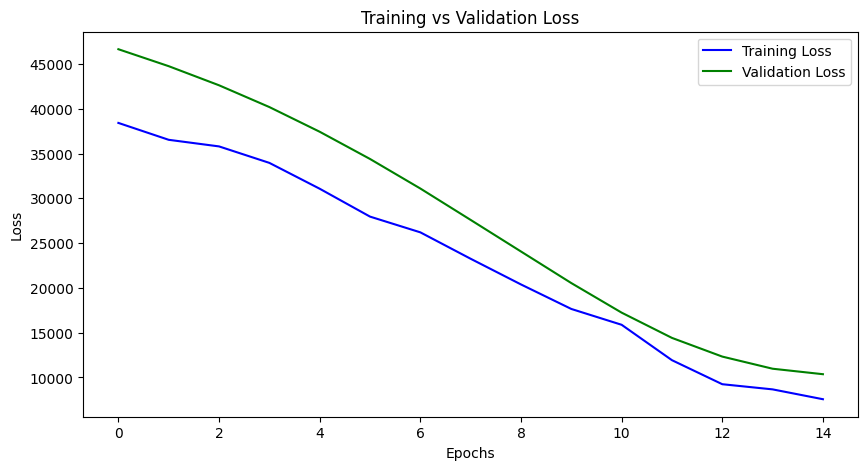

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: -0.0015


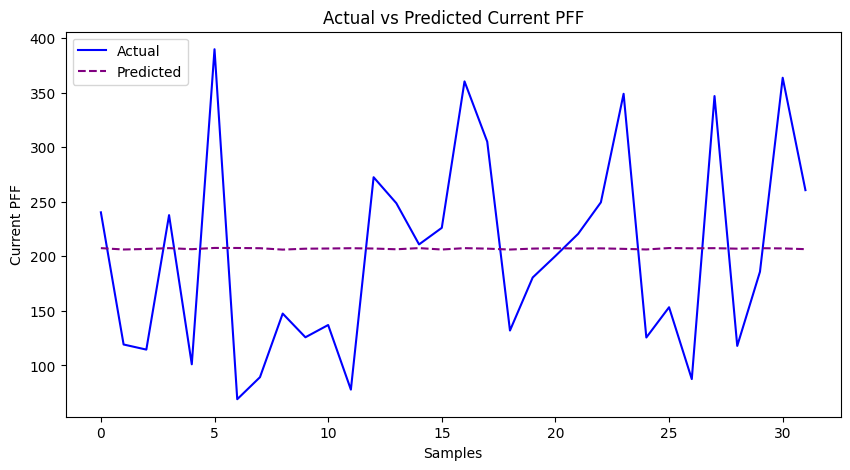

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9756.7217 - val_loss: 10243.3193
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9532.0176 - val_loss: 10213.3066
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10905.3652 - val_loss: 10137.5840
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8879.6143 - val_loss: 10189.8145
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7018.2070 - val_loss: 10563.2441
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6880.3618 - val_loss: 10955.1221
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8444.8975 - val_loss: 11195.7725
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10236.0098 - val_loss: 10897.2744
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8370.5195 - val_loss: 10675.0283
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8031.1748 - val_loss: 10297.7871
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6982.6201 - val_loss: 10113.2666
Epoch 12/20
3/3 

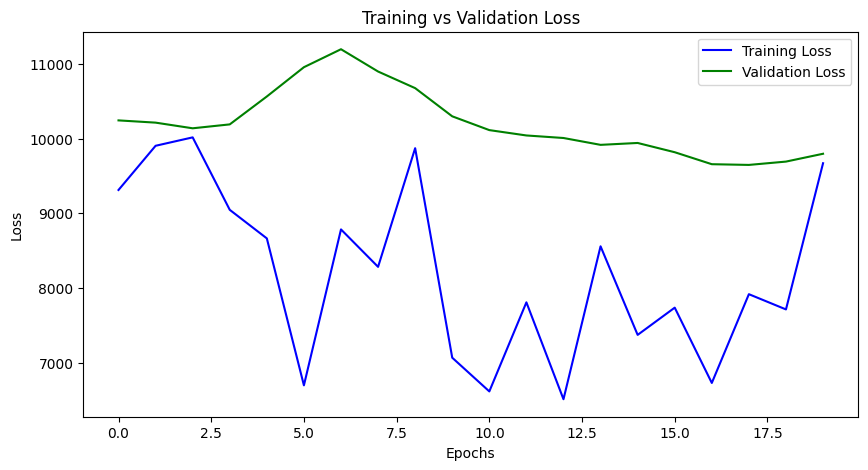

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R² Score: 0.0770


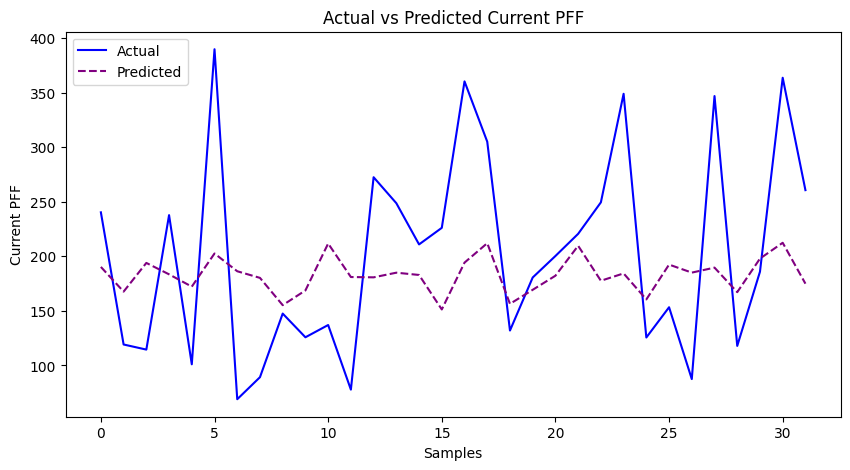

Epoch 1/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9360.9570 - val_loss: 9658.8916
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6968.2432 - val_loss: 9464.4092
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10722.8955 - val_loss: 9194.4268
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8159.3730 - val_loss: 9069.2910
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6969.0322 - val_loss: 8952.1611
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6289.8071 - val_loss: 8840.4551
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10019.2217 - val_loss: 8838.4248
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8616.6094 - val_loss: 8850.5156
Epoch 9/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7932.6191 - val_loss: 8752.5996
Epoch 10/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6626.8003 - val_loss: 8600.3467
Epoch 11/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8129.4365 - val_loss: 8575.9131
Epoch 12/25
3/3 ━━━━━━━━━━

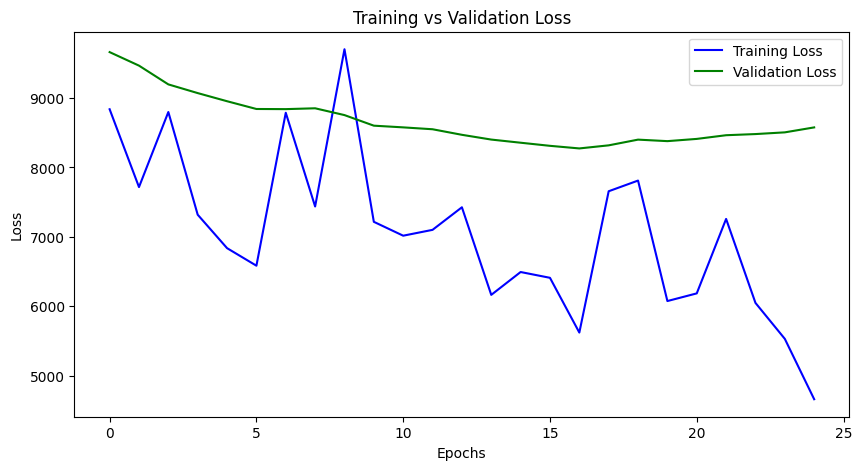

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R² Score: 0.2354


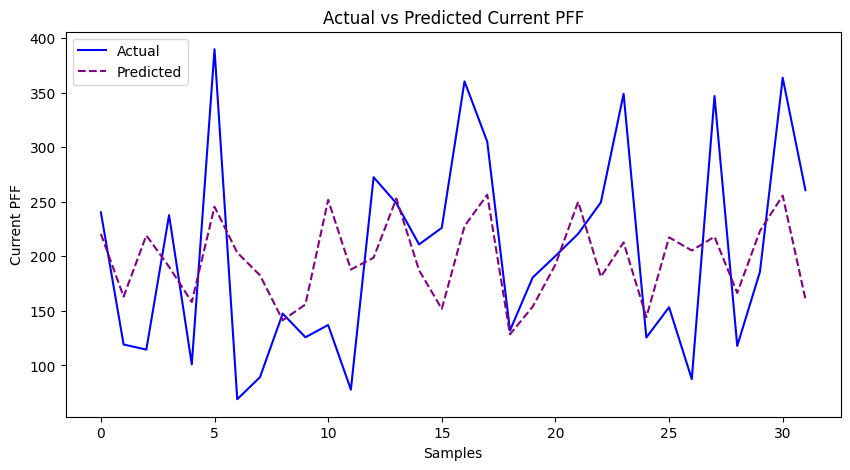

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7796.8662 - val_loss: 8656.1494
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6764.4600 - val_loss: 8599.4297
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8499.3379 - val_loss: 8568.5996
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5546.5552 - val_loss: 8529.0420
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6054.9775 - val_loss: 8477.6104
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5983.4160 - val_loss: 8561.2061
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6617.6348 - val_loss: 8674.0996
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6638.8125 - val_loss: 8792.8174
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6020.4390 - val_loss: 8949.1494
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6139.3975 - val_loss: 8906.7314
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6284.4458 - val_loss: 8903.0928
Epoch 12/30
3/3 ━━━━━━━━━━━━

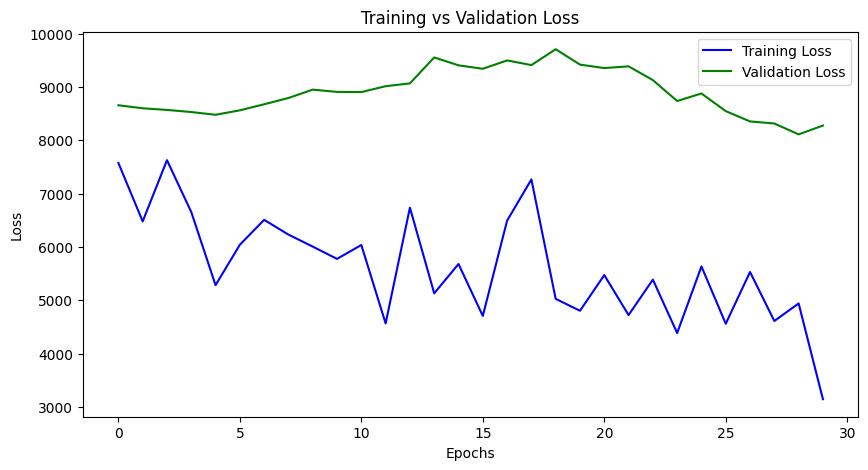

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: 0.4464


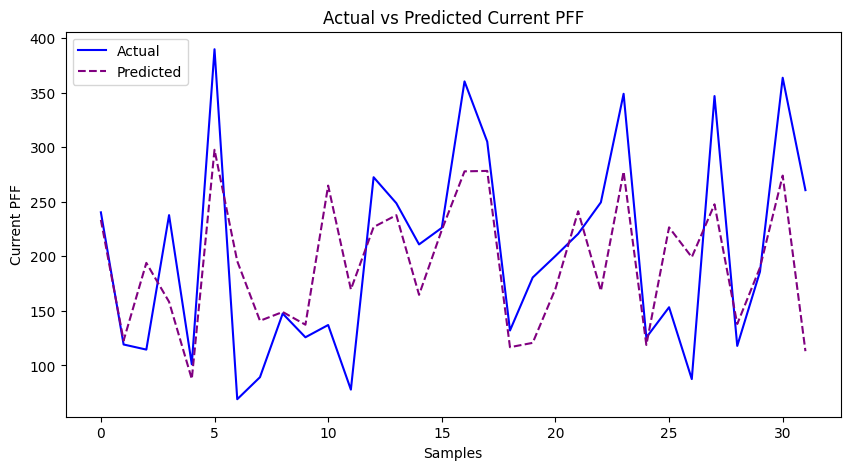

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5479.9736 - val_loss: 8762.2715
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4385.5986 - val_loss: 8854.7490
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4344.5703 - val_loss: 8666.6582
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6431.2627 - val_loss: 8391.1426
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4197.5098 - val_loss: 8087.3037
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4772.0762 - val_loss: 8132.9258
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3214.9753 - val_loss: 7843.8569
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5977.8584 - val_loss: 7433.6196
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4462.7031 - val_loss: 7334.4165
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4113.1016 - val_loss: 7269.7646
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4120.9009 - val_loss: 8888.6152
Epoch 12/50
3/3 ━━━━━━━━━━━━━

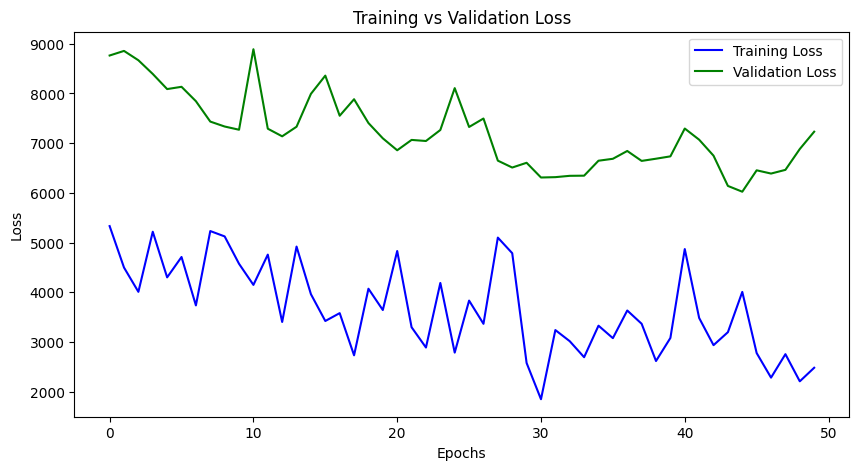

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: 0.5944


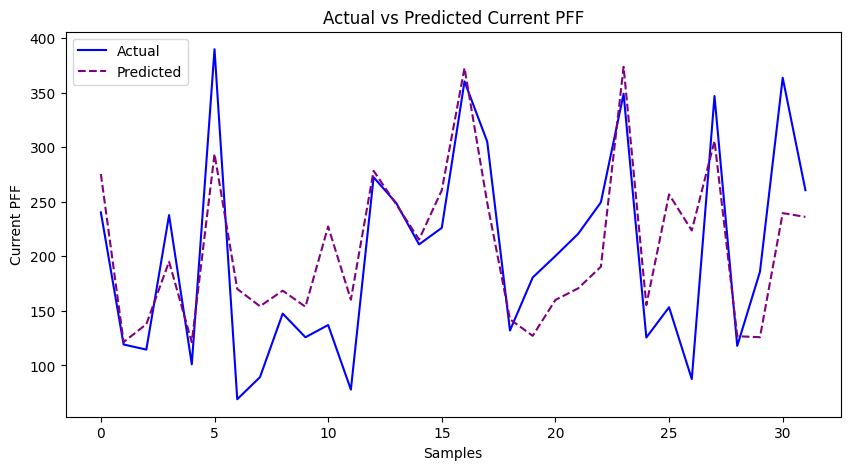

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3286.7625 - val_loss: 6552.4741
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3457.3438 - val_loss: 7409.3281
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3695.6387 - val_loss: 6487.6772
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3025.1348 - val_loss: 6619.1235
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1951.0386 - val_loss: 6347.1396
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2640.0342 - val_loss: 6996.4097
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2298.2605 - val_loss: 6675.1470
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2277.1106 - val_loss: 6187.2607
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2288.6619 - val_loss: 5819.5747
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2348.3186 - val_loss: 5892.2349
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3038.8696 - val_loss: 6055.2788
Epoch 12/100
3/3 ━

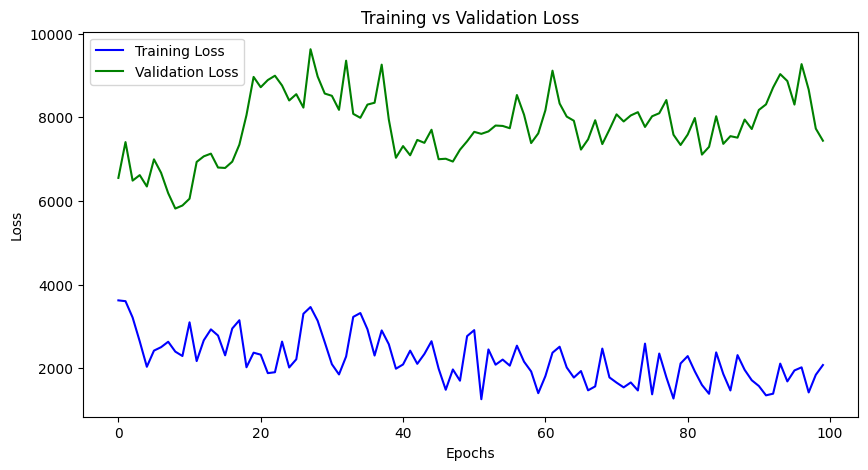

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R² Score: 0.7051


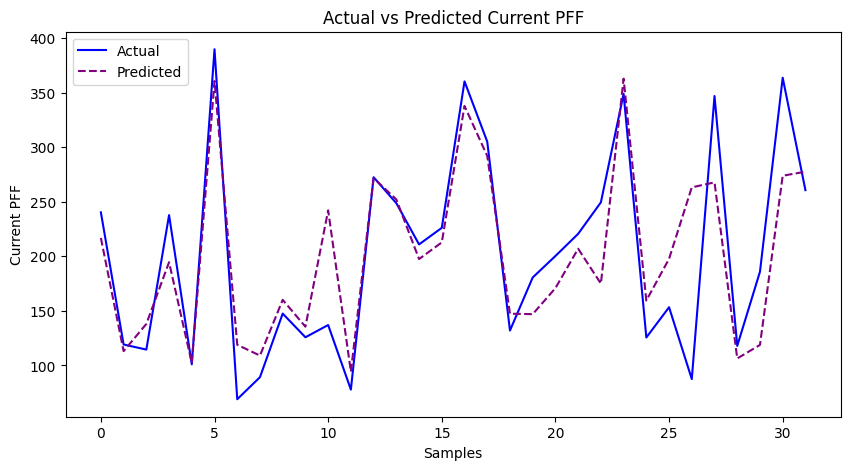

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1530.5076 - val_loss: 7740.2070
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2069.7793 - val_loss: 7582.2437
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2141.2195 - val_loss: 7335.3003
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1221.7825 - val_loss: 7724.6763
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1202.3647 - val_loss: 9341.8662
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1863.4982 - val_loss: 8869.6719
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1760.5581 - val_loss: 8777.4551
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1549.7371 - val_loss: 9607.5645
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1445.8678 - val_loss: 8158.1841
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1868.4658 - val_loss: 8035.8154
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1884.5817 - val_loss: 7974.6099
Epoch 12/250
3/3

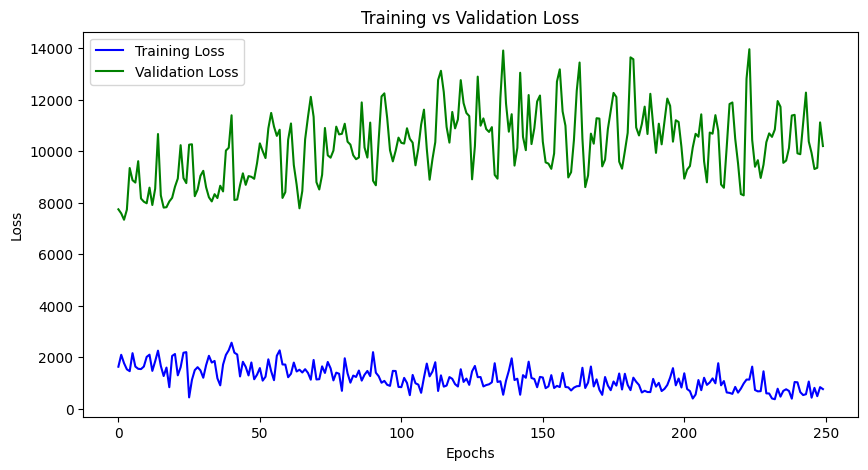

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R² Score: 0.7247


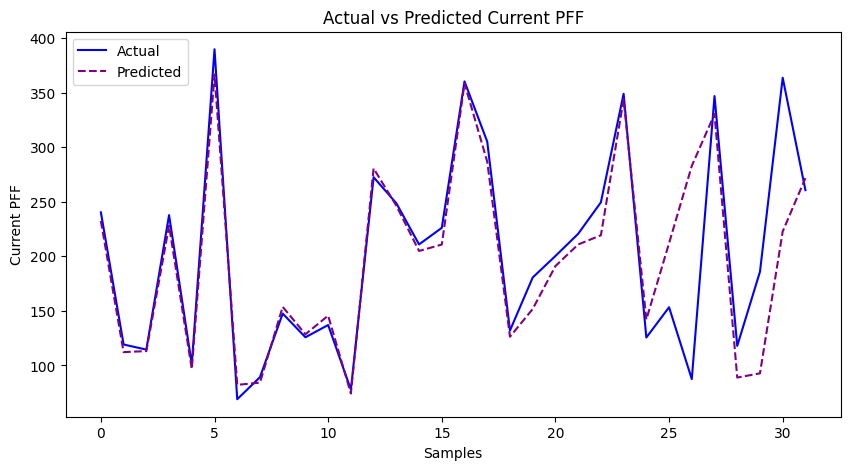

In [12]:
#Training the Model using RNN
epoch_list = [5,10,15,20,25,30,50,100,250]
for e in epoch_list:
    history = model.fit(S, t, epochs=e, batch_size = 9, validation_split=0.2)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    #Making predictions on the test set
    t_pred = model.predict(S)
    from sklearn.metrics import r2_score
    
    #Calculating R² score
    r2 = r2_score(t, t_pred)
    
    # Print R² score
    print(f"R² Score: {r2:.4f}")
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(t, label='Actual', color='blue')
    plt.plot(t_pred, label='Predicted', color='purple', linestyle='dashed')
    plt.title('Actual vs Predicted Current PFF')
    plt.xlabel('Samples')
    plt.ylabel('Current PFF')
    plt.legend()
    plt.show()

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Dropout, LayerNormalization, MultiHeadAttention
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
# Replace with the actual path to your dataset
df = pd.read_csv('Combined_RB.csv')

# Select the first 6 columns
columns_to_use = ['weighted_avg_avoided_tackles', 'weighted_avg_breakaway_attempts', 
                  'weighted_avg_breakaway_percent', 'weighted_avg_breakaway_yards',
                  'weighted_avg_declined_penalties', 'weighted_avg_designed_yards']
df = df[columns_to_use]

# Preprocessing
# Convert categorical columns to numerical
categorical_columns = ['Team', 'Position']
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(df[categorical_columns]).toarray()
df = pd.concat(
    [df.drop(columns=categorical_columns), pd.DataFrame(encoded_categorical, index=df.index)], axis=1
)

# Extract features and labels
features = df.drop(columns=['weighted_avg_avoided_tackles', 'weighted_avg_breakaway_attempts', 'weighted_avg_breakaway_percent'])  # Features
targets = ['weighted_avg_avoided_tackles', 'weighted_avg_breakaway_attempts', 'weighted_avg_breakaway_percent']  # Targets (one at a time)

# Reshape data for RNN (assume 3 timesteps for simplicity)
timesteps = 3
num_samples = features.shape[0] // timesteps  # Ensure divisible by timesteps
features = features.iloc[:num_samples * timesteps].to_numpy()
features = features.reshape(num_samples, timesteps, -1)

# Initialize R^2 values storage
r2_scores = []

# Train and evaluate the model for each target
for target in targets:
    # Prepare target data
    y = df[target].iloc[:num_samples * timesteps].to_numpy()
    y = y.reshape(num_samples, timesteps).mean(axis=1)  # Aggregate to match samples
    
    # Split into train/test
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)
    
    # Define the RNN model
    inputs = Input(shape=(timesteps, X_train.shape[2]))
    dense_input = Dense(16, activation='relu')(inputs)
    attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)
    attention_output = LayerNormalization()(attention_output)
    rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)
    rnn_output = Dropout(0.2)(rnn_output)
    output = Dense(1)(rnn_output)
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    
    # Predict and calculate R² score
    y_pred = model.predict(X_test).flatten()
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    print(f"R² for target '{target}': {r2:.4f}")

# Plot R² values
plt.figure(figsize=(8, 5))
plt.bar(targets, r2_scores, color='skyblue')
plt.xlabel('Target Variable')
plt.ylabel('R² Score')
plt.title('R² Scores for RNN Model Predictions')
plt.show()

KeyError: "None of [Index(['Team', 'Position'], dtype='object')] are in the [columns]"